**`Load Package`**

In [1]:
import os
import logging
import subprocess
import psutil
import resource
# memory_limit = 20 * 1024 * 1024 * 1024
# resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

## `2. Integration with different integration tools`

In [2]:
import omicverse as ov
print(f"omiverse version: {ov.__version__}")
import scanpy as sc
print(f"scanpy version: {sc.__version__}")
import scvi
print(f"scvi version: {scvi.__version__}")
import scib
print(f"scib version: {scib.__version__}")
# ov.ov_plot_set()

omiverse version: 1.6.10
scanpy version: 1.10.4
scvi version: 1.3.0
scib version: 1.1.7


In [3]:
adata_bk = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_qc.h5ad')
adata_bk.obs['batch'].unique()

['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']
Categories (10, object): ['10X', 'Freytag', 'Oetjen_A', 'Oetjen_P', ..., 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']

In [4]:
adata = adata_bk.copy()
adata.layers["counts"] = adata.X.copy()
adata = ov.pp.preprocess(
    adata,
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.raw = adata
adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()
adata = adata[:, adata.var.highly_variable_features]

ov.pp.scale(adata,max_value=10)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

sc.pp.neighbors(
    adata,
    use_rep='X_pca',
    key_added='pca_neighbours'
)

sc.tl.umap(
    adata,
    neighbors_key='pca_neighbours'
)

key_added = 'X_pca'
adata.obsm[f'{key_added}_umap'] = adata.obsm['X_umap'].copy()

Begin robust gene identification
After filtration, 8128/8128 genes are kept.     Among 8128 genes, 8128 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


Time to analyze data in cpu: 9.615925550460815 seconds.
End of size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


In [5]:
adata

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/mi

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_pca_umap1', ylabel='X_pca_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_pca_umap1', ylabel='X_pca_umap2'>]

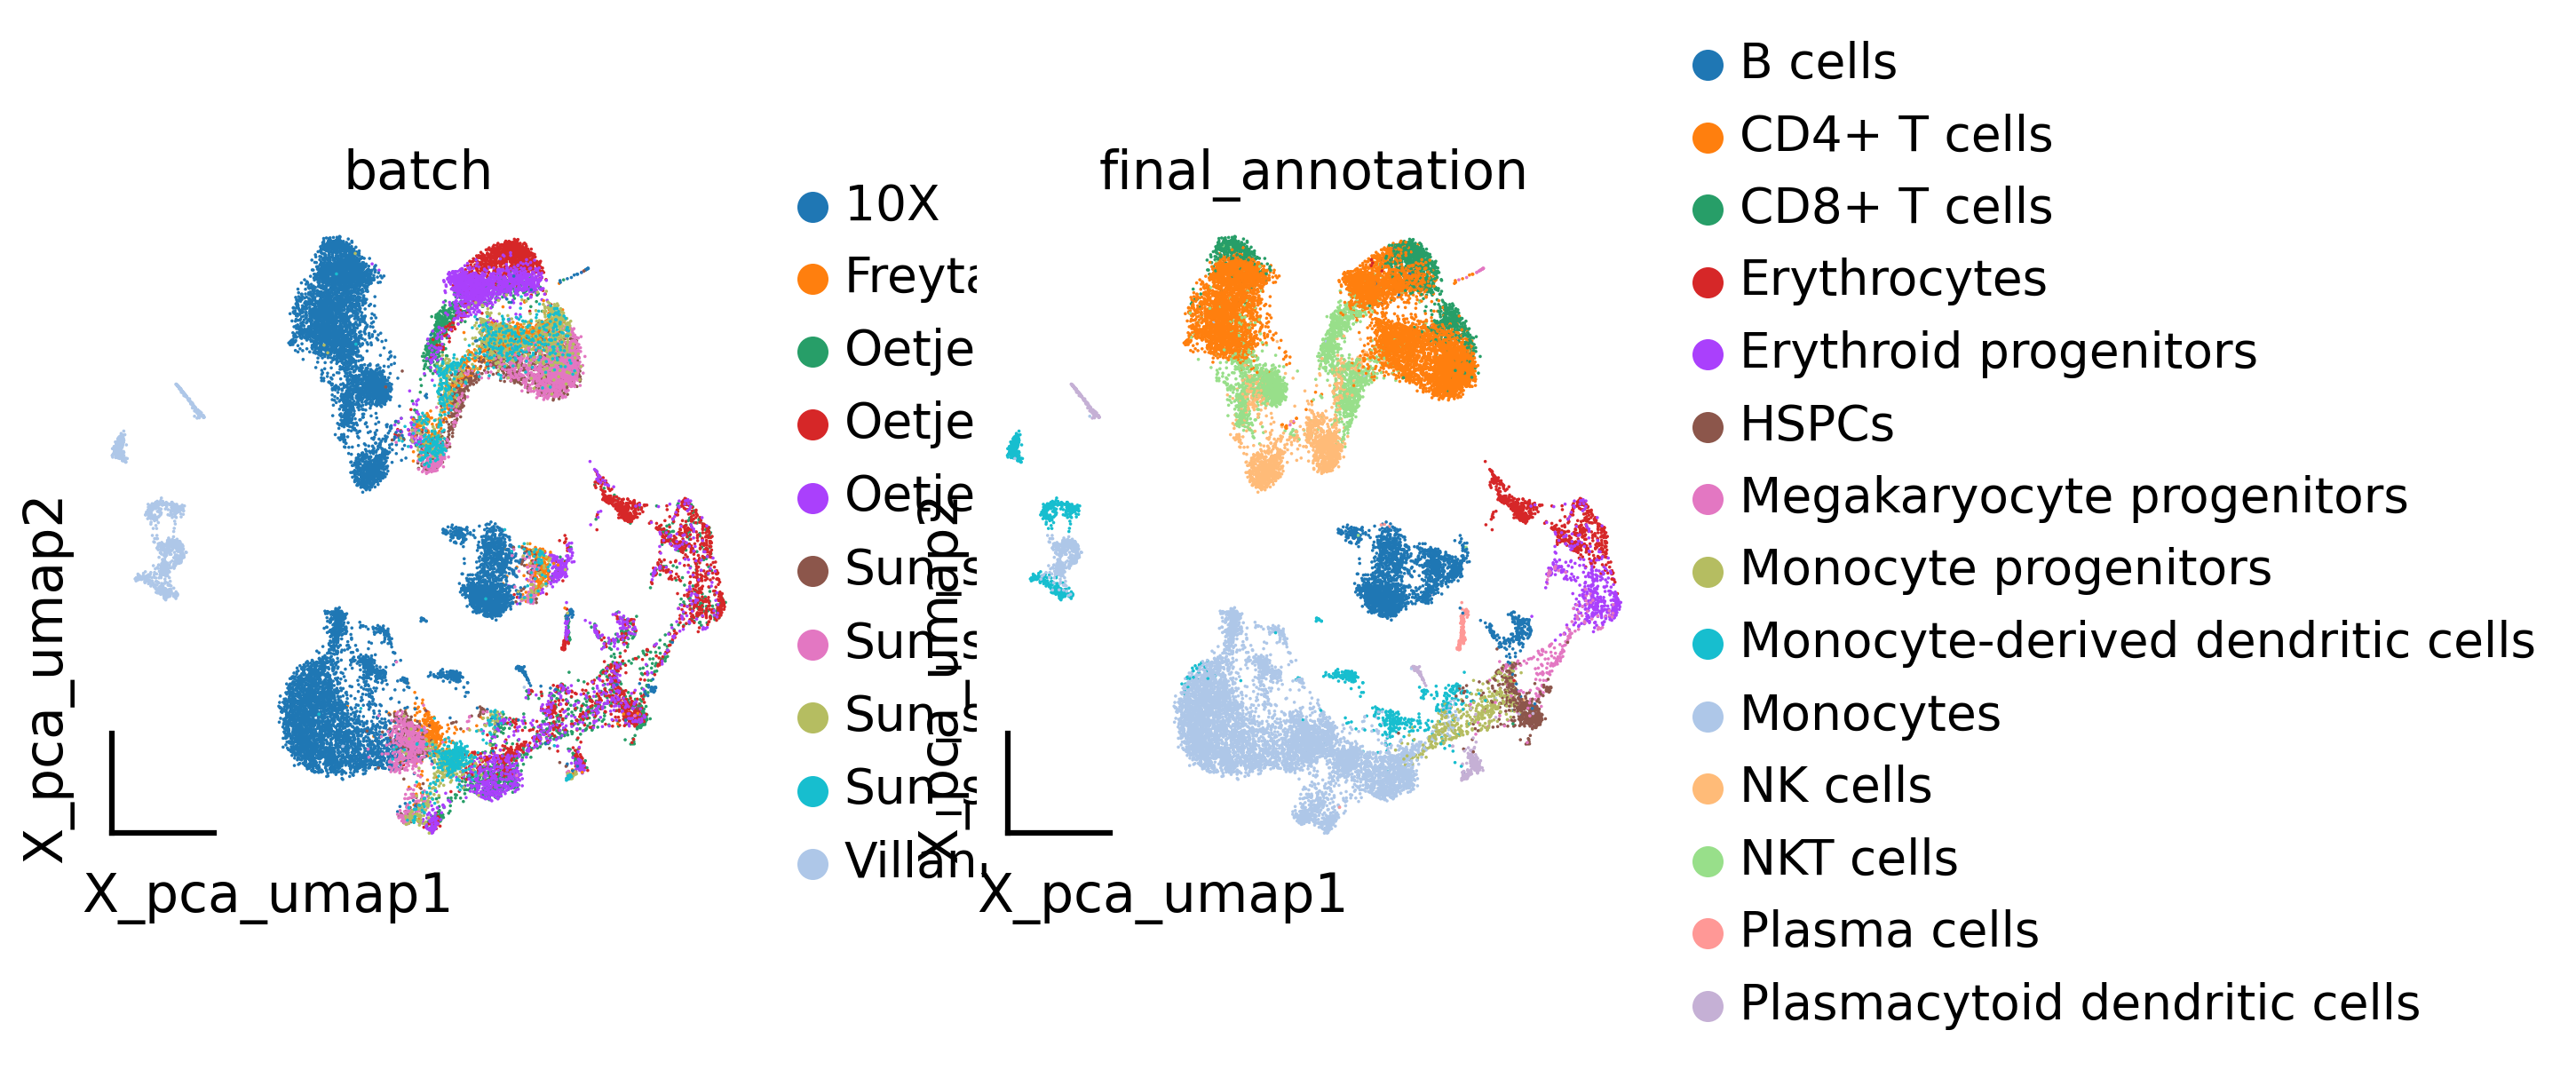

In [6]:
ov.utils.embedding(adata,
                basis='X_pca_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [7]:
adata.write_h5ad('../Data/Immune_human_mouse/human_alldata_reduction.h5ad')
adata = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_reduction.h5ad')

In [8]:
adata

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'log1p', 'pca', 'pca_neighbours', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_pca_umap', 'X_umap', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_connectivities', 'pca_neighbours_distances'

In [6]:
adata.obs_keys   batch   chemistry

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'log1p', 'pca', 'pca_neighbours', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_harmoney_umap', 'X_harmony', 'X_pca', 'X_pca_umap', 'X_scVI', 'X_scVI_umap', 'X_scanorama', 'X_scanorama_umap', 'X_umap', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_

**`2.1 Harmony`**

In [72]:
adata_harmony=adata.copy()
ov.single.batch_correction(adata_harmony,batch_key='batch',
                                        methods='harmony',n_pcs=50)

2025-04-27 13:11:51,979 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


...Begin using harmony to correct batch effect


2025-04-27 13:11:56,014 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-04-27 13:11:56,293 - harmonypy - INFO - Iteration 1 of 10
2025-04-27 13:12:06,970 - harmonypy - INFO - Iteration 2 of 10
2025-04-27 13:12:15,768 - harmonypy - INFO - Iteration 3 of 10
2025-04-27 13:12:23,397 - harmonypy - INFO - Iteration 4 of 10
2025-04-27 13:12:30,702 - harmonypy - INFO - Iteration 5 of 10
2025-04-27 13:12:37,694 - harmonypy - INFO - Converged after 5 iterations


In [74]:
sc.pp.neighbors(
    adata_harmony,
    use_rep='X_harmony',
    key_added='harmony_neighbours'
)

sc.tl.umap(
    adata_harmony,
    neighbors_key='harmony_neighbours'
)

key_added = 'X_harmoney'
adata_harmony.obsm[f'{key_added}_umap'] = adata_harmony.obsm['X_umap'].copy()
print(adata_harmony)

computing neighbors
    finished: added to `.uns['harmony_neighbours']`
    `.obsp['harmony_neighbours_distances']`, distances for each pair of neighbors
    `.obsp['harmony_neighbours_connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:15)
AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'sc

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_harmoney_umap1', ylabel='X_harmoney_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_harmoney_umap1', ylabel='X_harmoney_umap2'>]

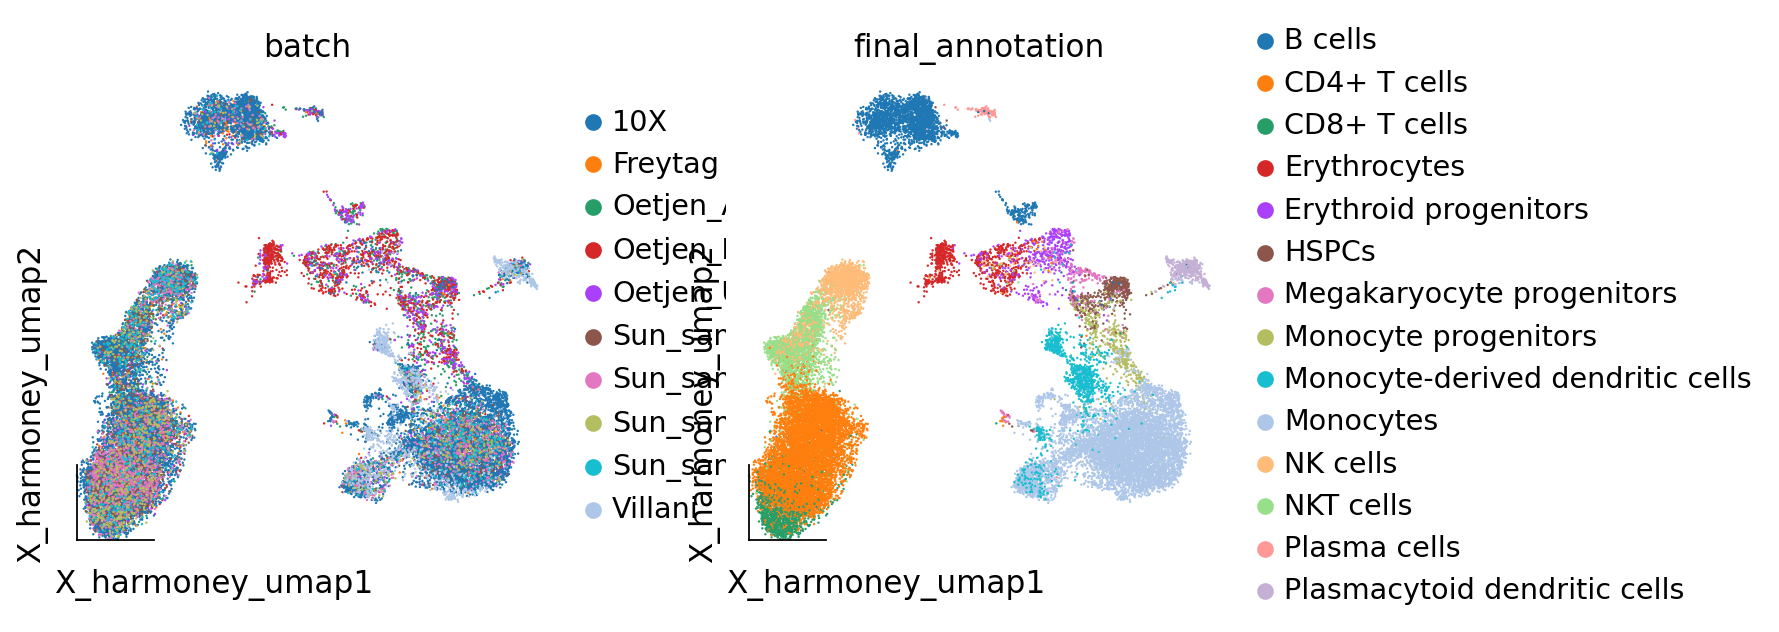

In [75]:
ov.utils.embedding(adata_harmony,
                basis='X_harmoney_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [76]:
adata.obsm['X_harmony'] = adata_harmony.obsm['X_harmony'].copy()
adata.obsm['X_harmoney_umap'] = adata_harmony.obsm['X_harmoney_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours

**`2.2 Scanorama`**

In [59]:
# adata = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_qc.h5ad')
adata_scanorama=adata.copy()
# ov.single.batch_correction(adata_scanorama,batch_key='batch',
#                                         methods='scanorama',n_pcs=50)

In [60]:
batch_key = "batch"
label_key = "final_annotation"
adata_scanorama.layers["counts"] = adata_scanorama.X.copy()
sc.pp.highly_variable_genes(adata_scanorama, batch_key = batch_key)
# Select all genes that are variable in at least 2 batches
var_select = adata_scanorama.var.highly_variable_nbatches > 2
var_genes = var_select.index[var_select]

adatas = [adata_scanorama[adata_scanorama.obs[batch_key] == batch_value][:, var_genes].copy() for batch_value in adata_scanorama.obs[batch_key].unique()]

In [61]:
# adata_scanorama.layers["counts"] = adata_scanorama.X.copy()

# 将数据按 chemistry 分开
# batches = adata_scanorama.obs['study'].cat.categories.tolist()
# alldata = {}
# for batch in batches:
#     alldata[batch] = adata_scanorama[adata_scanorama.obs['study'] == batch, :]

# adatas = list(alldata.values())
scanorama.integrate_scanpy(adatas, dimred=30)
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_s = np.concatenate(scanorama_int)

adata_scanorama.obsm["X_scanorama"] = all_s

Found 517 genes among all datasets
[[0.         0.871881   0.91650672 0.05902111 0.01727447 0.01295585
  0.02015355 0.01535509 0.01555556 0.        ]
 [0.         0.         0.871132   0.09988249 0.01880141 0.03721112
  0.01214258 0.00680272 0.00555556 0.        ]
 [0.         0.         0.         0.34618609 0.2154233  0.05029338
  0.03352892 0.0766974  0.05111111 0.        ]
 [0.         0.         0.         0.         0.91466498 0.62558607
  0.52517162 0.53401361 0.45777778 0.00782779]
 [0.         0.         0.         0.         0.         0.97119893
  0.97025172 0.94642857 0.92888889 0.2260274 ]
 [0.         0.         0.         0.         0.         0.
  0.8506363  0.61734694 0.48888889 0.02641879]
 [0.         0.         0.         0.         0.         0.
  0.         0.66751701 0.60888889 0.04892368]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.84111111 0.02152642]
 [0.         0.         0.         0.         0.         0.
  0.     

In [62]:
sc.pp.neighbors(
    adata_scanorama,
    use_rep='X_scanorama',
    key_added='scanorama_neighbours'
)

sc.tl.umap(
    adata_scanorama,
    neighbors_key='scanorama_neighbours'
)

key_added = 'X_scanorama'
adata_scanorama.obsm[f'{key_added}_umap'] = adata_scanorama.obsm['X_umap'].copy()
print(adata_scanorama)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'log1p', 'pca', 'pca_neighbours', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap', 'scanorama_neighbours'
    obsm: 'X_pca', 'X_pca_umap', 'X_umap', 'scaled|original|X_pca', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>]

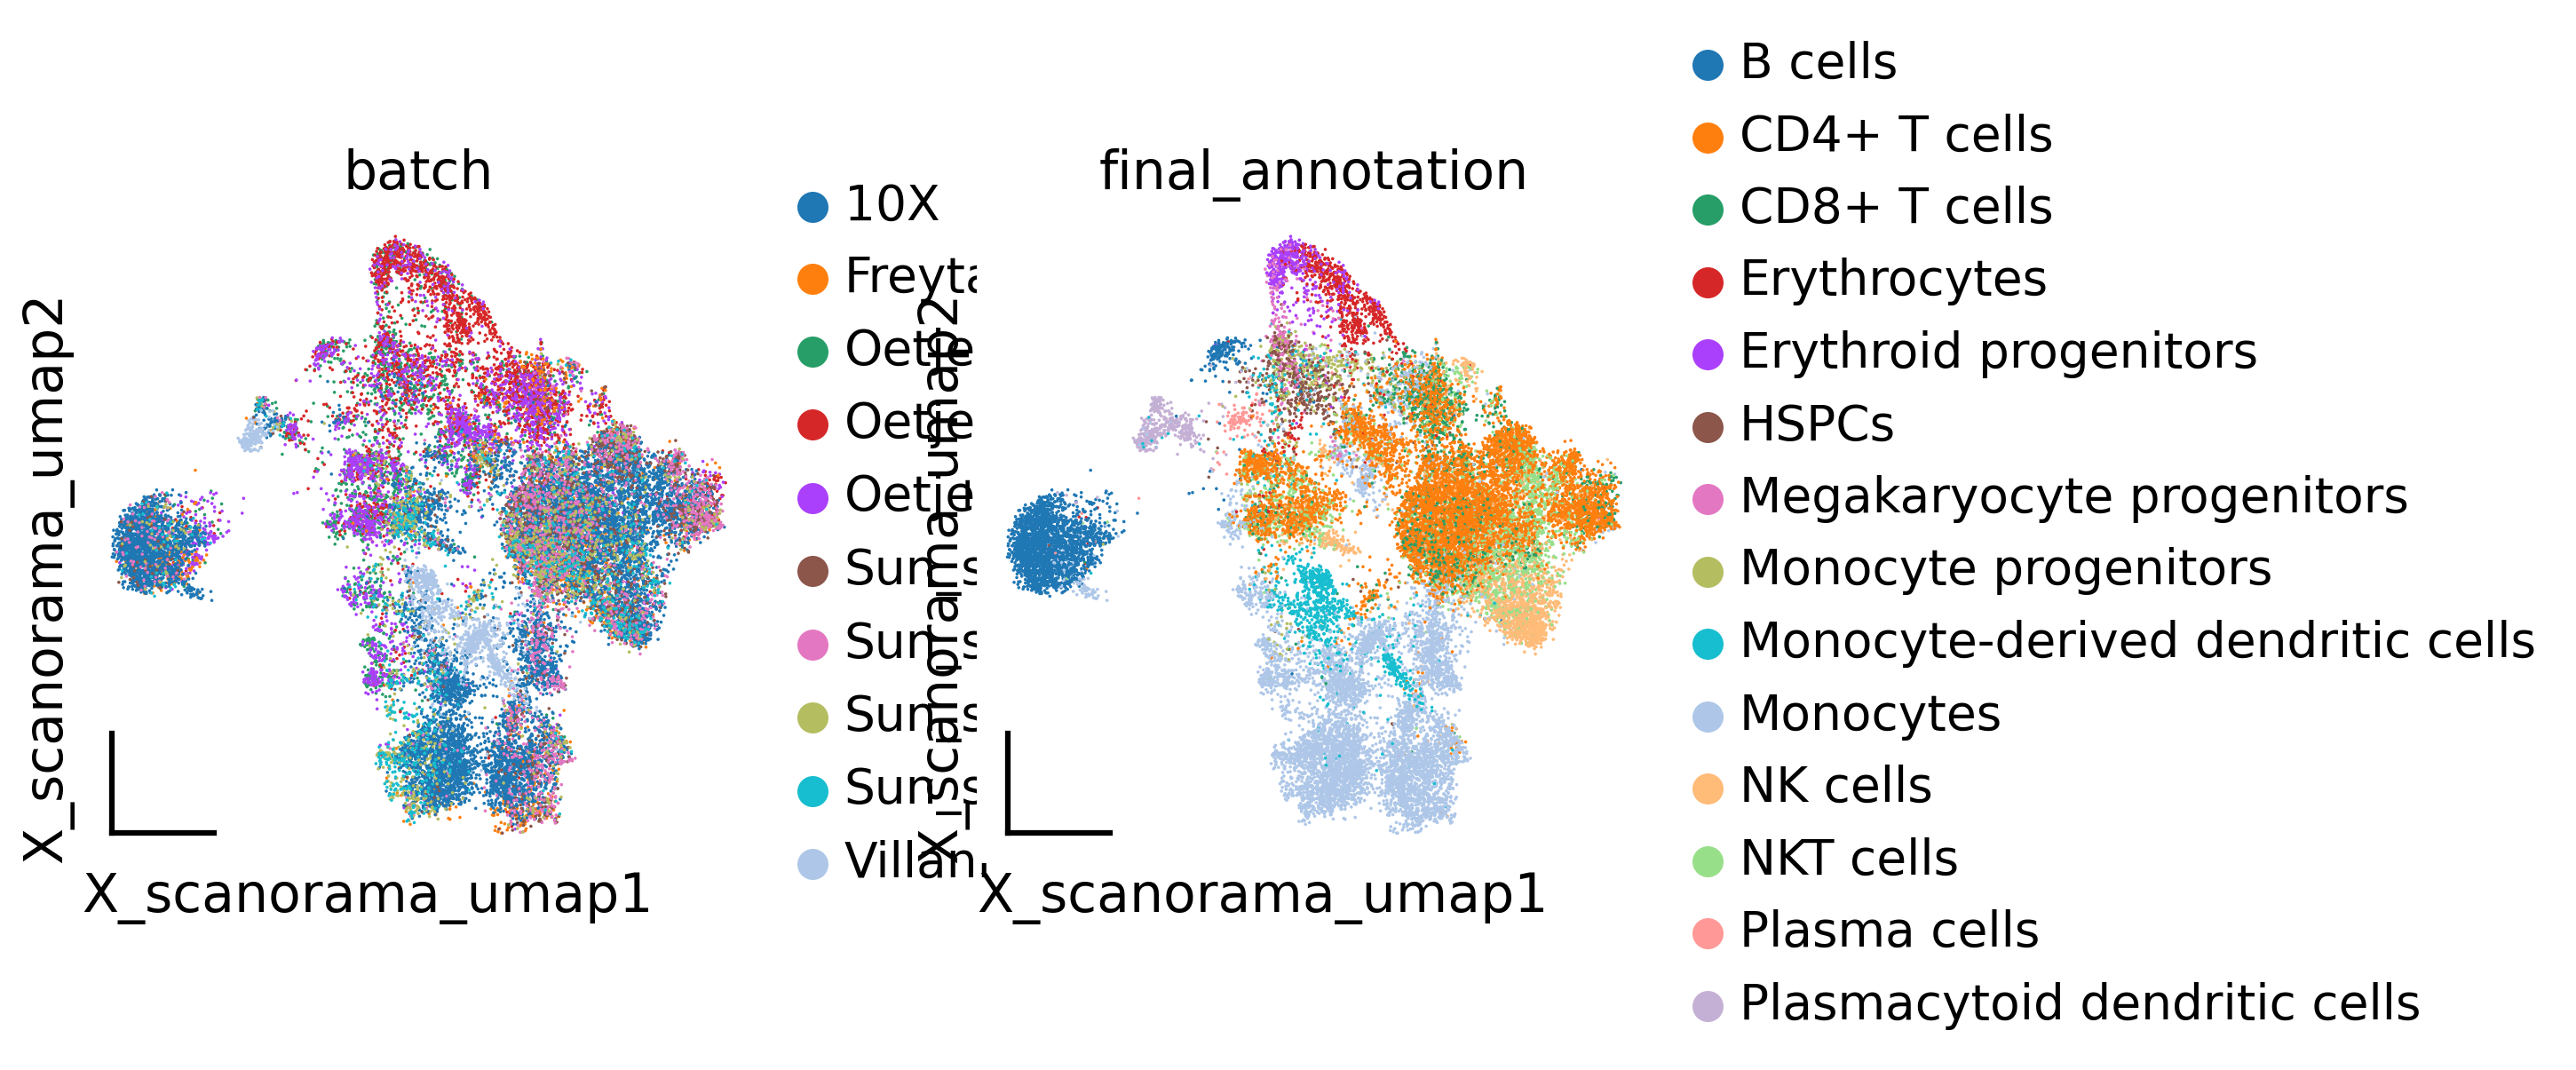

In [63]:
ov.utils.embedding(adata_scanorama,
                basis='X_scanorama_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [64]:
adata.obsm['X_scanorama'] = adata_scanorama.obsm['X_scanorama'].copy()
adata.obsm['X_scanorama_umap'] = adata_scanorama.obsm['X_scanorama_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'log1p', 'pca', 'pca_neighbours', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_pca_umap', 'X_umap', 'scaled|original|X_pca', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_connectivities', 'pca_ne

**`2.3 scVI`**

In [86]:
adata_scVI=adata.copy()
scvi.model.SCVI.setup_anndata(adata_scVI, layer="counts", batch_key="batch")
vae = scvi.model.SCVI(adata_scVI, n_layers=2, n_latent=30, gene_likelihood="nb")
vae

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [87]:
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/314 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=314` reached.


In [90]:
print(vae)
print()
adata_scVI.obsm["X_scVI"] = vae.get_latent_representation()
print(adata_scVI)

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False



AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI'
    varm: 'PCs', '

In [91]:
sc.pp.neighbors(
    adata_scVI,
    use_rep='X_scVI',
    key_added='scVI_neighbours'
)

sc.tl.umap(
    adata_scVI,
    neighbors_key='scVI_neighbours'
)

key_added = 'X_scVI'
adata_scVI.obsm[f'{key_added}_umap'] = adata_scVI.obsm['X_umap'].copy()
print(adata_scVI)

computing neighbors
    finished: added to `.uns['scVI_neighbours']`
    `.obsp['scVI_neighbours_distances']`, distances for each pair of neighbors
    `.obsp['scVI_neighbours_connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:14)
AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scVI_umap1', ylabel='X_scVI_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scVI_umap1', ylabel='X_scVI_umap2'>]

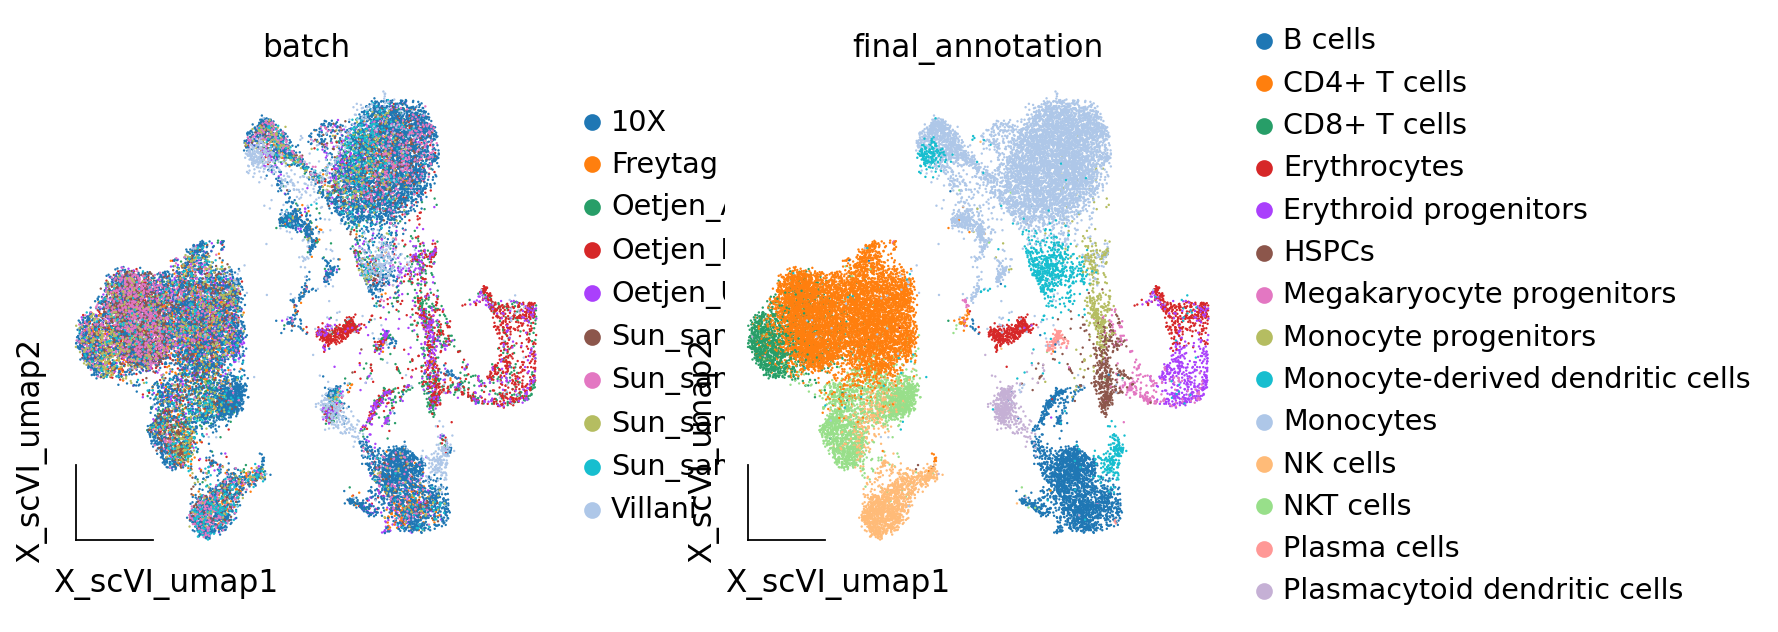

In [92]:
ov.utils.embedding(adata_scVI,
                basis='X_scVI_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [94]:
adata.obsm['X_scVI'] = adata_scVI.obsm['X_scVI'].copy()
adata.obsm['X_scVI_umap'] = adata_scVI.obsm['X_scVI_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 25507 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI', 'X_scVI_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 's

In [ ]:
adata.write_h5ad('../Data/Immune_human_mouse/human_alldata_reduction.h5ad')

In [80]:
adata = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_reduction.h5ad')

adata = adata.raw.to_adata()
print(adata.X.shape)

obs_df = adata.obs.copy()
for col in obs_df.columns:
    if obs_df[col].dtype.name == "category":
        obs_df[col] = obs_df[col].astype("object")
adata.obs = obs_df

adata.write_h5ad('../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI.h5ad', convert_strings_to_categoricals = False)

(25507, 8128)


**`2.5 Integrate cca rpca`**

In [81]:
adata = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI.h5ad')

In [82]:
cca_pca = pd.read_csv("../Data/raw_seurat/cca_pca.csv", index_col=0)
cca_pca = cca_pca.loc[adata.obs_names]
adata.obsm["X_cca"] = cca_pca.to_numpy()

cca_umap = pd.read_csv("../Data/raw_seurat/cca_umap.csv", index_col=0)
cca_umap = cca_pca.loc[adata.obs_names]
adata.obsm["X_cca_umap"] = cca_pca.to_numpy()

In [84]:
rpca_pca = pd.read_csv("../Data/raw_seurat/rpca_pca.csv", index_col=0)
rpca_pca = rpca_pca.loc[adata.obs_names]
adata.obsm["X_rpca"] = rpca_pca.to_numpy()

rpca_umap = pd.read_csv("../Data/raw_seurat/rpca_umap.csv", index_col=0)
rpca_umap = rpca_umap.loc[adata.obs_names]
adata.obsm["X_rpca_umap"] = rpca_umap.to_numpy()

In [86]:
adata.write_h5ad('../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI_cca_rpca.h5ad')

**`Update scanorama`**

In [65]:
inte = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI_cca_rpca.h5ad')

In [66]:
inte.obsm['X_scanorama'] = adata_scanorama.obsm['X_scanorama'].copy()
inte.obsm['X_scanorama_umap'] = adata_scanorama.obsm['X_scanorama_umap'].copy()

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>]

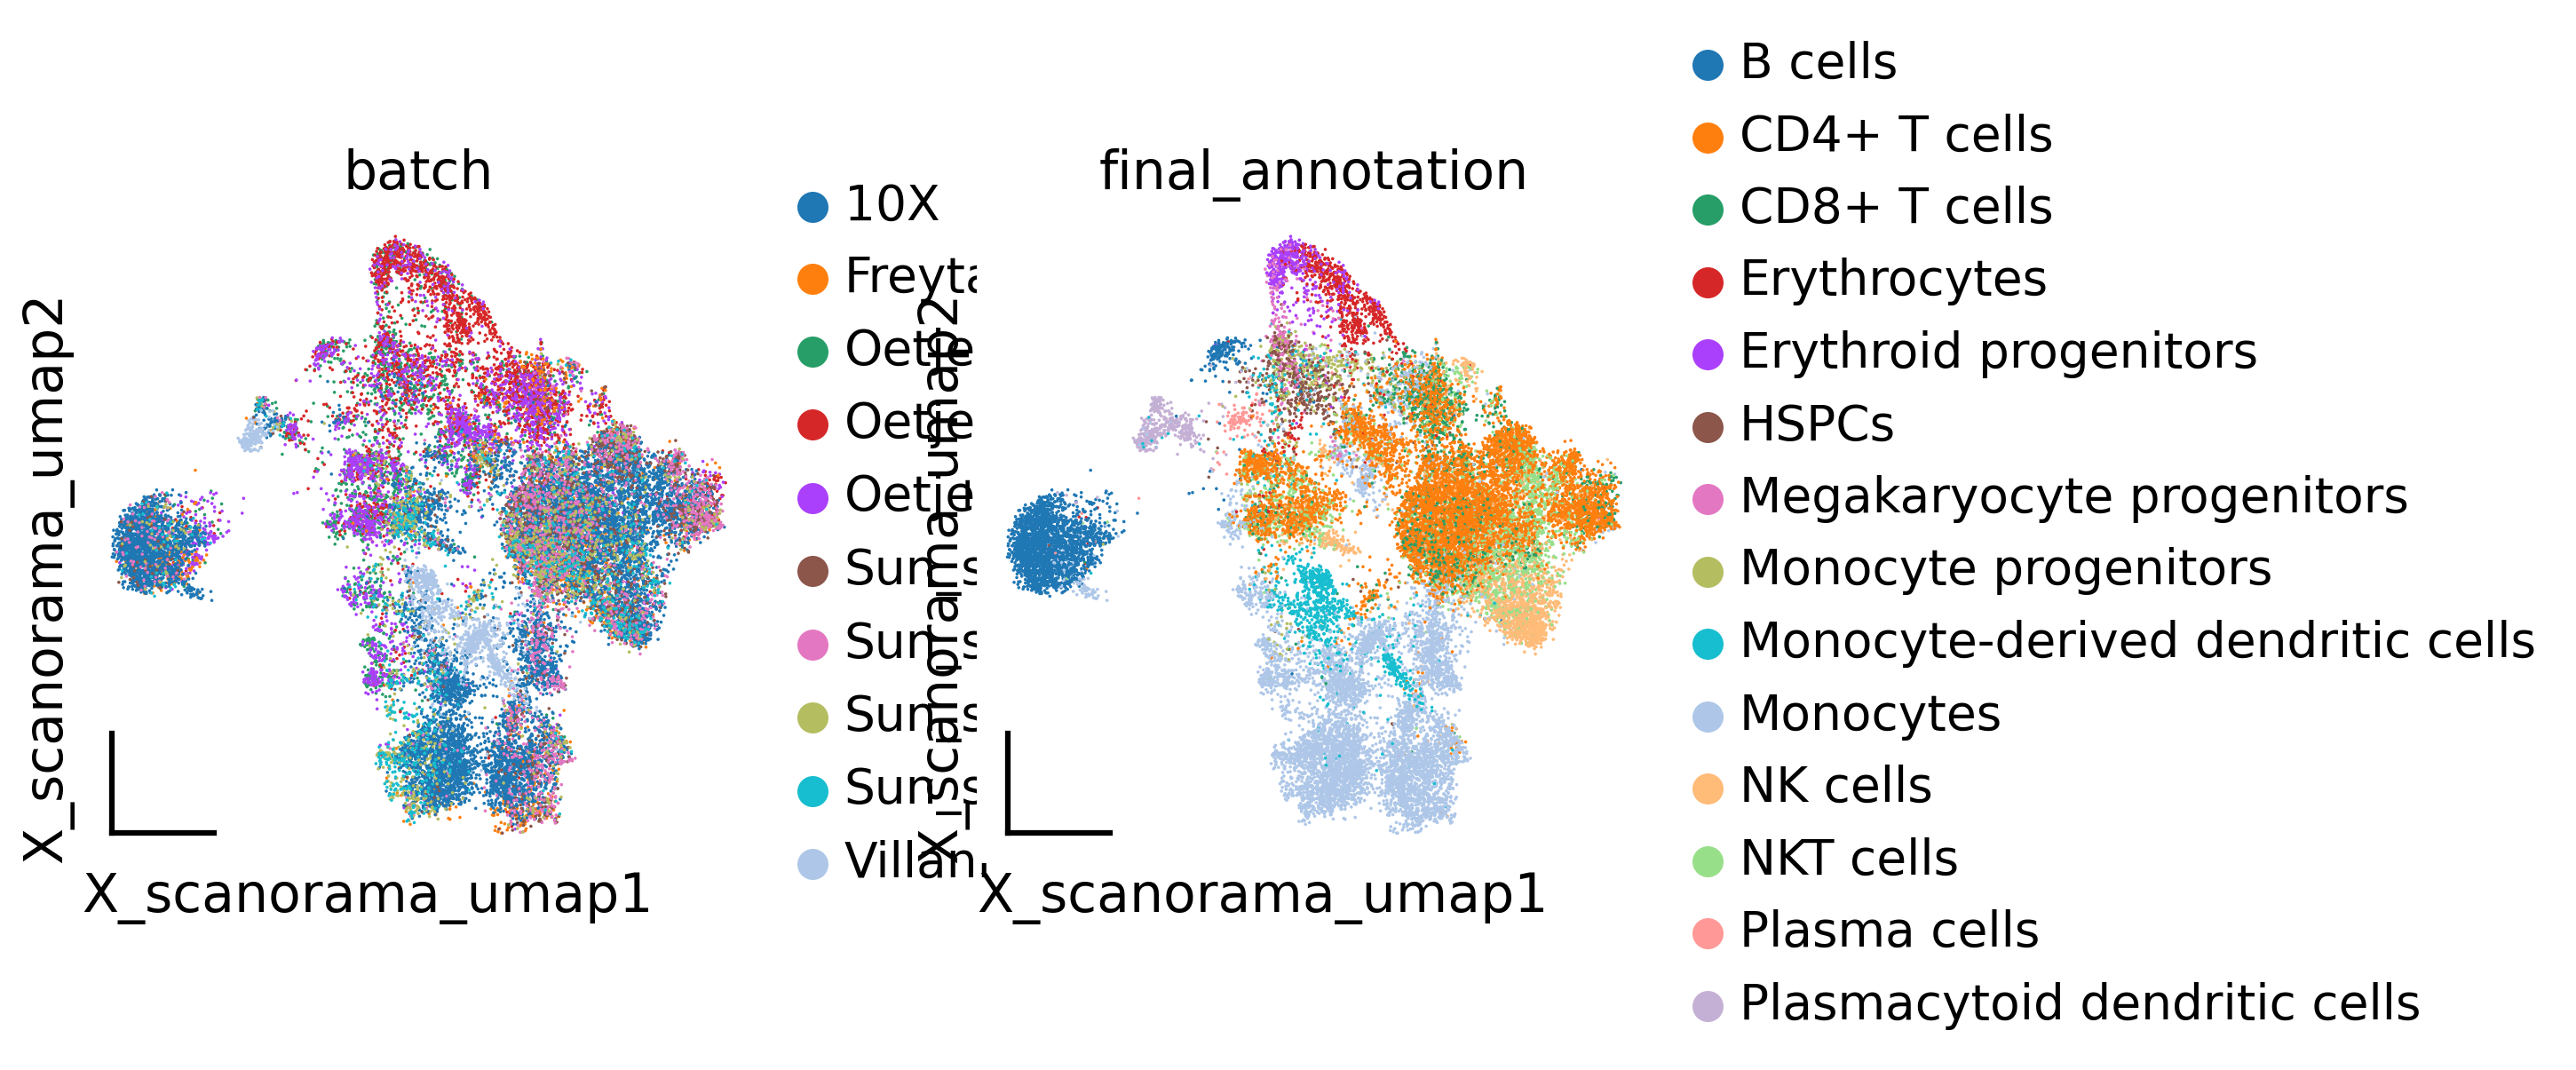

In [67]:
ov.utils.embedding(inte,
                basis='X_scanorama_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [68]:
import pandas as pd

# 保存 X_scanorama
pd.DataFrame(inte.obsm['X_scanorama'], index=inte.obs_names).to_csv('../Data/Immune_human_mouse/Immune_human_all_X_scanorama.csv')

# 保存 UMAP 坐标
pd.DataFrame(inte.obsm['X_scanorama_umap'], index=inte.obs_names, columns=['UMAP_1', 'UMAP_2']).to_csv('../Data/Immune_human_mouse/Immune_human_all_X_scanorama_umap.csv')


In [69]:
print(inte.X.shape)

(25507, 8128)


In [70]:
inte

AnnData object with n_obs × n_vars = 25507 × 8128
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'log1p', 'pca', 'pca_neighbours', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_cca', 'X_cca_umap', 'X_harmoney_umap', 'X_harmony', 'X_pca', 'X_pca_umap', 'X_rpca', 'X_rpca_umap', 'X_scVI', 'X_scVI_umap', 'X_scanorama', 'X_scanorama_umap', 'X_umap', 'scaled|original|X_pca'
    obsp: 'pca_neighbours_connectivities', 

In [71]:
obs_df = inte.obs.copy()
for col in obs_df.columns:
    if obs_df[col].dtype.name == "category":
        obs_df[col] = obs_df[col].astype("object")
inte.obs = obs_df

inte.write_h5ad('../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI_cca_rpca_redoscanorama.h5ad', convert_strings_to_categoricals = False)

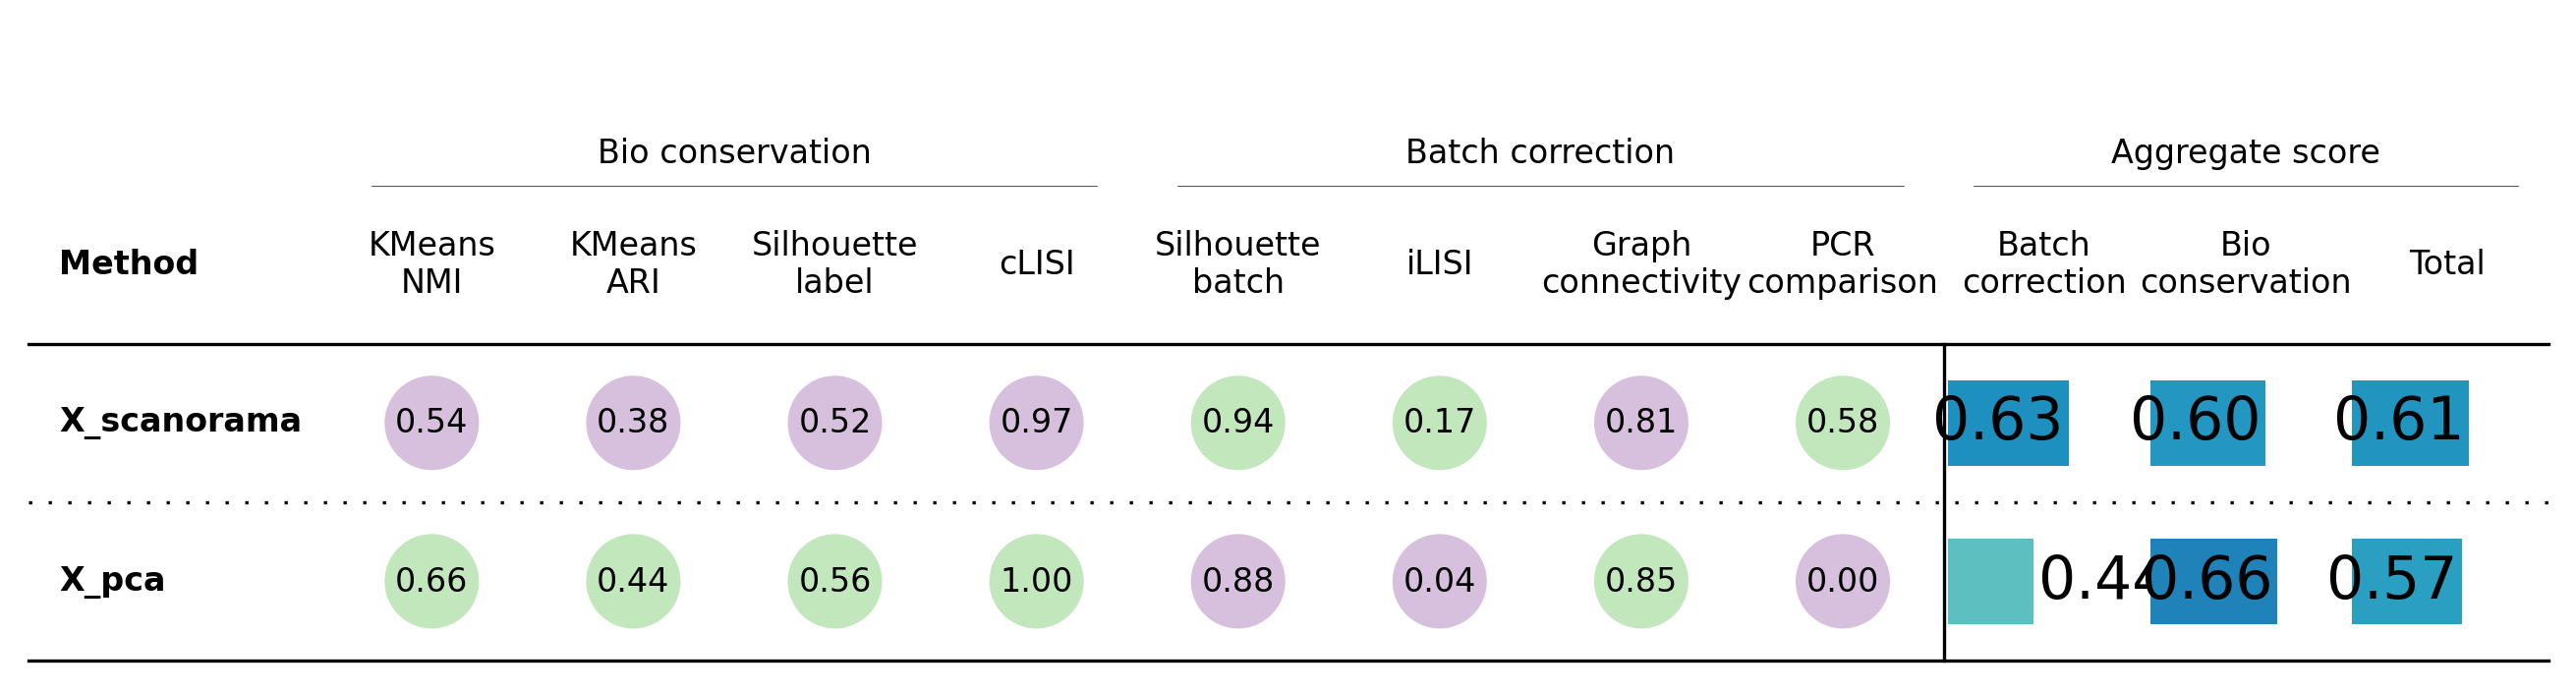

In [74]:
bm.plot_results_table(min_max_scale=False) # , save_dir="../Analysis/"